## Integrantes
* Andrea Mejia
* Renzo Richle
* Lucio Cornejo
* Claudia Vivas

1. [Paso 2](#paso-2)
    - [Adquisición de Datos](#adquisicion-de-datos)
2. [Paso 3](#paso-3)
    - [Entendimiento de los datos](#entendimiento-de-los-datos)
    - [Duplicados](#duplicados)
    - [Vacios](#vacios)
    - [Medidas de resumen para variables numéricas](#medidas-de-resumen-para-variables-numericas)
    - [Medidas de resumen para variables categóricas](#medidas-de-resumen-para-variables-categoricas)
    - [Tratamiento de datos atípicos](#tratamiento-de-datos-atipicos)
        - [Outliers por exceso](#outliers-por-exceso)
        - [Outliers por defecto](#outliers-por-defecto)
        - [Separar la base en atipicos y no atipicos](#separar-la-base-en-atipicos-y-no-atipicos)
    

## Paso 2: Adquisicion de Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Cargamos la base de datos
# tracks = pd.read_csv(r'E:\Documentos\Github\proyecto-analisis-de-datos-1INF03\datos\tracks.csv')
# tracks = pd.read_csv(r'F:\2022-1\Analisis de datos\Tarea Academica\archive\tracks.csv')
tracks = pd.read_csv("../datos/tracks.csv")

In [3]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


Notamos que algunas de las columnas nos generan la misma información, pese a su presentación diferente.

Por ejemplo, la variable **id_artists** es un identificador único por artista, así que 
nos proporciona casi completamente la misma información que la variable **artists** (nombre del artista).

Análogamente sucede para las variables **id** (identificador de la canción) y **name** (nombre de la canción).

Sin embargo, debido a la posibilidad de que existan canciones con el mismo nombre,
o artistas con el mismo nombre _musical_, no descartaremos, por ahora, a las columnas **id** e **id_artists**,
en caso resulten necesarias más adelante en el análisis.

## Paso 3: Entendimiento de los datos

In [4]:
print('La base tiene', tracks.shape[0], 'filas y', tracks.shape[1], 'columnas')

La base tiene 586672 filas y 20 columnas


In [5]:
print('Las columnas se la base se llaman:', tracks.columns.to_list())

Las columnas se la base se llaman: ['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists', 'id_artists', 'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


In [6]:
tracks.dtypes
print('Se tiene los siguientes tipos de datos por columna: \n',tracks.dtypes)

Se tiene los siguientes tipos de datos por columna: 
 id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object


In [7]:
# Descripción de los datos
tracks.info()

type(tracks.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

pandas.core.indexes.base.Index

In [8]:
# Convertimos la variable 'release_date', de object a datetime64[ns]
tracks['release_date'] = pd.to_datetime(tracks['release_date'], format = "%Y-%m-%d")

Eliminaremos la columna de 'artists' ya que no presenta información relevante para el modelo debido a que se cuenta con la columna id_artists  que guardaría la información de los artistas por lo que se estaría duplicando esta información 

In [9]:
print(tracks.shape)
tracks.drop(["artists"], axis = 1, inplace = True)
print(tracks.shape)

(586672, 20)
(586672, 19)


### Datos duplicados

In [10]:
# Como cada fila de este dataset corresponde a una canción diferente,
# omitimos los duplicados vía el identificador de cada canción
print(tracks.shape)
tracks.drop_duplicates(subset = 'id', inplace = True)
print(tracks.shape)

(586672, 19)
(586672, 19)


Se observa que los datos no tienen filas con valores duplicados, es decir, no existen registros repetidos.

### Datos vacíos

In [11]:
# Contabilizamos vacíos
vacios = pd.DataFrame(tracks.isnull().sum()).sort_values(0, ascending=True)
vacios.columns = ['vacios']
vacios['vacios%'] = round(vacios['vacios']/tracks.shape[0], 2)*100
vacios

,vacios,vacios%
id,0,0.0
valence,0,0.0
liveness,0,0.0
instrumentalness,0,0.0
acousticness,0,0.0
speechiness,0,0.0
mode,0,0.0
loudness,0,0.0
tempo,0,0.0
key,0,0.0


Encontramos que solo la columna "name" almacena valores vacios, en particular, 71.

Como se comentó en el paso dos, es posible que la columna "name" se trate de un identificador.
Asimismo, la información de la columna "id" identifica a las canciones, así que, como
la variable "id" **no presenta valores vacíos**, no es necesario remover las filas
asociadas a valores vacíos de la columna "name".

Más bien, basta descartar a la columna "name", pues su información podemo obtenerla
vía la variable "id".

### Medidas de resumen para variables numericas

In [12]:
# Separación de variables en numéricas y categóricas
dfnum = tracks.select_dtypes(include = ['float64', 'int64'])
dfcat = tracks.select_dtypes(exclude = ['float64', 'int64'])

In [13]:
print('Variables categóricas', dfcat.shape)
print('Variables numéricas', dfnum.shape)

Variables categóricas (586672, 4)
Variables numéricas (586672, 15)


In [14]:
# Estadisticos desciptivas para las variables numéricas
dfnum.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


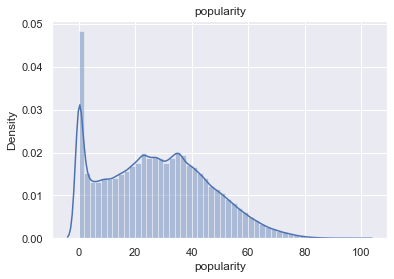

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


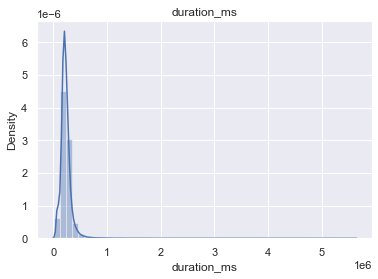

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


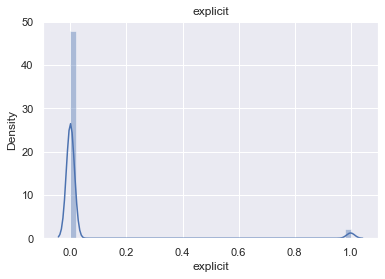

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


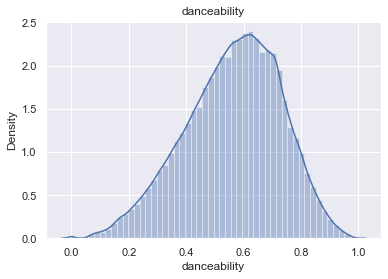

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


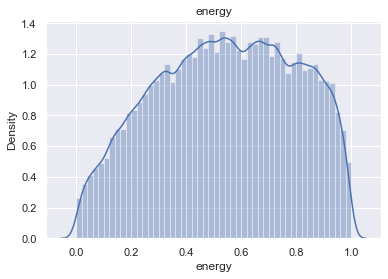

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


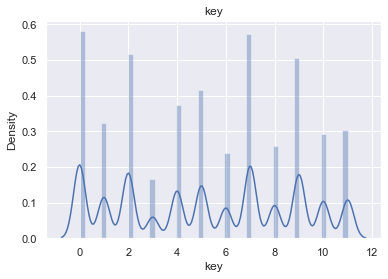

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


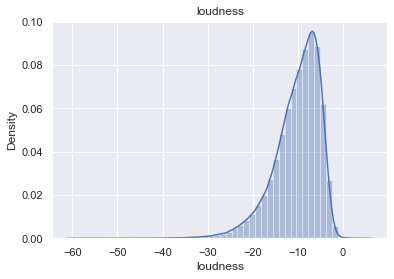

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


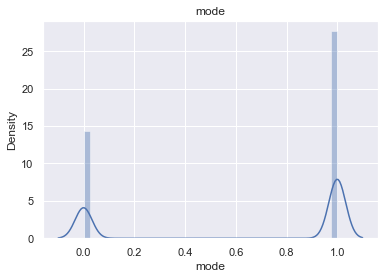

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


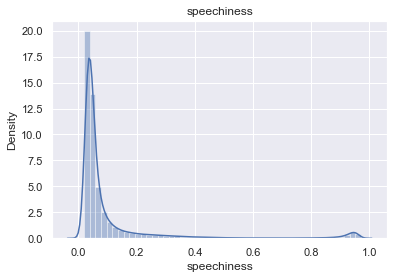

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


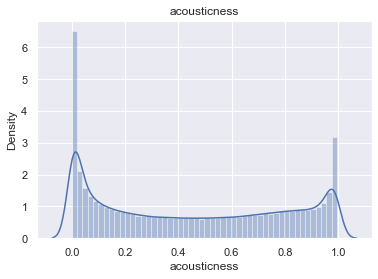

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


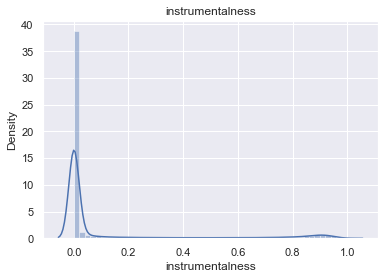

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


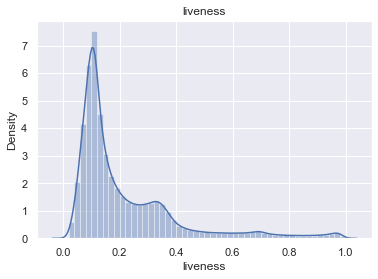

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


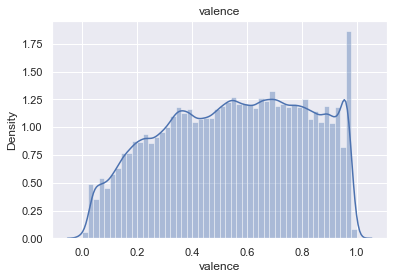

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


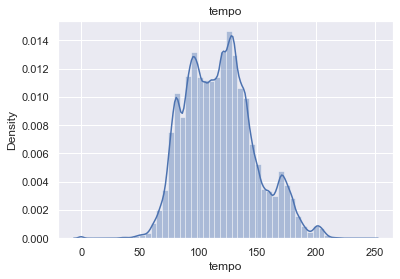

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


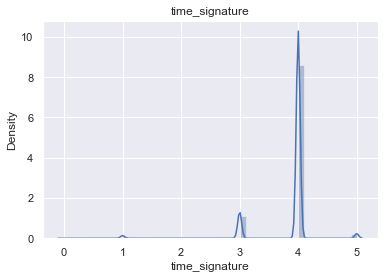

In [15]:
# Distribuciones de los datos numéricos
columnas_numericas = dfnum.columns.tolist()
sns.set(style = "darkgrid")
for col in columnas_numericas:
   sns.distplot(dfnum[col])
   plt.title(col)
   plt.show()

Note entonces que las variables **explicit**, **key**, **mode** y **time_signature** no parecen ser variables numéricas.

En base a la descripción de tales variabes, como se observa en la tabla presentada en el paso 2,
convertiremos aquellas tres variables a strings, por tratarse de valores categóricos.

En particular, la variable **explicit** es un boolean. 

Por ello, volvemos a separar en dos grupos a las variables del dataset en original.

In [16]:
# Variable explicit
print(tracks[["explicit"]].value_counts())
# Como tal variable vale 0 o 1, y, según su definición
# es de tipo boolean, no es necesario convertirla a boolean.
# La convertirmos a string para separar la data en variables
# númericas y categóricas.

# Variables string
tracks[["key", "mode", "time_signature", "explicit"]] = tracks[["key", "mode", "time_signature", "explicit"]].astype('string')

# División de variables numéricas y categóricas
dfnum = tracks.select_dtypes(include = ['float64', 'int64'])
dfcat = tracks.select_dtypes(exclude = ['float64', 'int64'])

# Nuevas dimensiones
print('Variables categóricas', dfcat.shape)
print('Variables numéricas', dfnum.shape)


explicit
0           560808
1            25864
dtype: int64
Variables categóricas (586672, 8)
Variables numéricas (586672, 11)


### Medidas de resumen para variables categóricas

In [17]:
# Comparamos las variables, posiblemente idénticas en 
# información, "id" y "name"
for columna in dfcat.columns[0:2]:
  print(dfcat[columna].value_counts())

35iwgR4jXetI318WEWsa1Q    1
6cHlho8Qe04uAIa1hd6efJ    1
1AL2EDY1U2dLL0WqQGtNu0    1
4vsj6KApKrZnQnF76Zve2u    1
5D0srsR8tggP6mLAdBn8d9    1
                         ..
2LQ4m8ippuDqoUp1xBNEhh    1
0AXvsASR6KBRuiVpO5YLYf    1
0Bmbax5v1Vn8HTxbeW1Uaf    1
2Chd3LE68nQnVjPOfreCuN    1
5Ocn6dZ3BJFPWh4ylwFXtn    1
Name: id, Length: 586672, dtype: int64
Summertime                                  101
Intro                                        92
Year 3000                                    91
Hold On                                      87
2000 Years                                   76
                                           ... 
0024 - und die silberne Spinne - Teil 31      1
בוקר של קרנבל                                 1
0024 - und die silberne Spinne - Teil 30      1
Disguise                                      1
A Day At A Time                               1
Name: name, Length: 446474, dtype: int64


Notamos entonces que la variable **name** presenta repeticiones en algunas de sus categorías.

En base a lo explicado , optaremos por descartar, más adelante, la columna **name**, 

porque realizaremos algunas transformaciones para este dato, con fin exploratorio de la data.

In [18]:
#print(dfcat[['release_date']].mode())
#print(dfcat['release_date'].median())

In [19]:
dfcat.dtypes

id                        object
name                      object
explicit                  string
id_artists                object
release_date      datetime64[ns]
key                       string
mode                      string
time_signature            string
dtype: object

Como las variables **id** e **id_artists** son Identificadores,
no vale la pena describir sus estadísticos. 

Consideremos entonces solo a las variables categóricas
**release_date**, **key**, **mode** y **time_signature**.

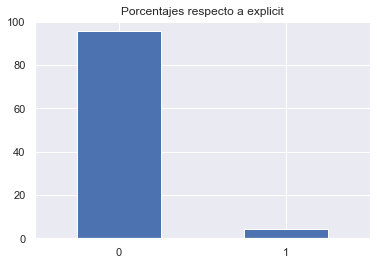

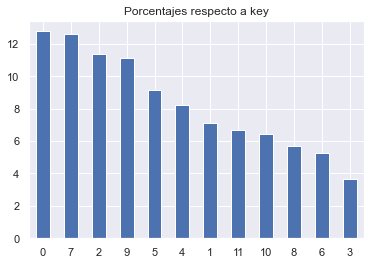

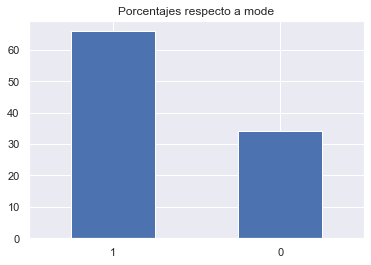

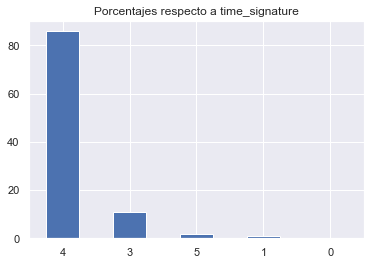

In [20]:
for columna in ["explicit", "key", "mode", "time_signature"]:
  (100 * dfcat[columna].value_counts() / len(dfcat[columna])).plot(
    kind = "bar",
    title = f"Porcentajes respecto a {columna}", 
    rot = 0
  )
  plt.show()

### **Tratamiento de Datos Atípicos y Estadísticas Descriptivas**

### Tratamiento de datos atípicos

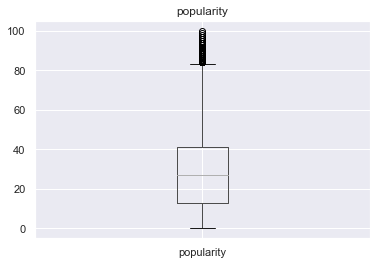

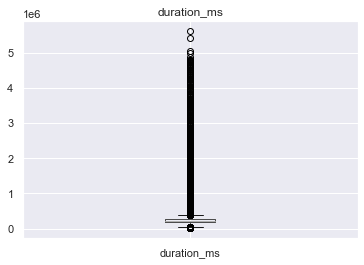

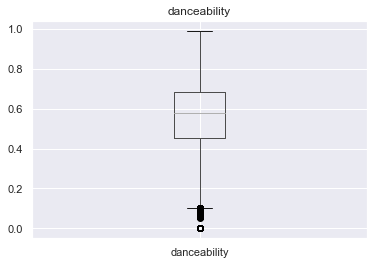

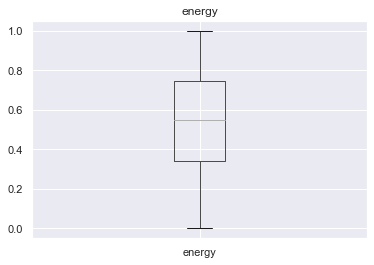

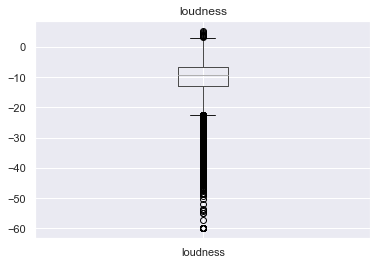

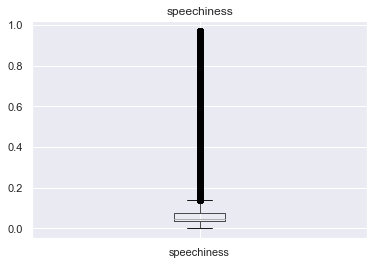

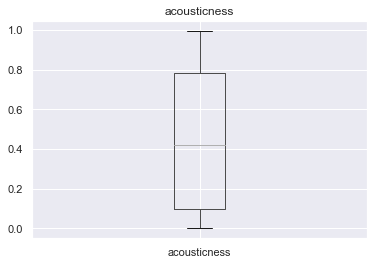

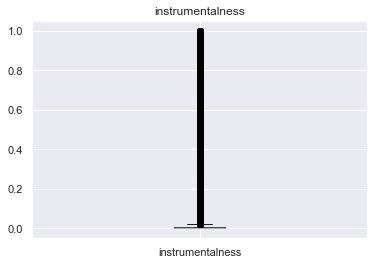

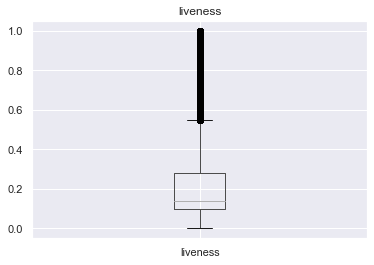

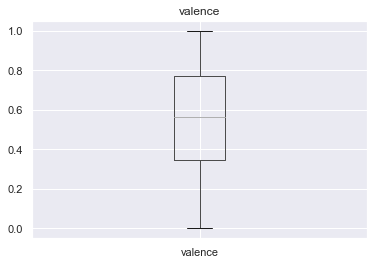

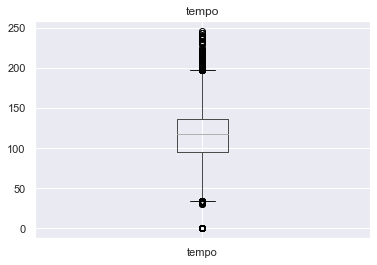

In [21]:
# Graficamos los boxplots de las variables numéricas
columnas = dfnum.columns.to_list()

for columna in columnas:
  dfnum.boxplot(column = columna)
  plt.title(columna)
  plt.show()


Respecto a la manera estándar pata calcular valores atípicos, se observa que casi todas las
filas numéricas presentarían outliers. Sin embargo, aquel criterio estándar es de utilidad
cuando la variable analizada posee una distribución aproximadamente gaussiana.

Por ello, generemos **Q-Q plots** para darnos una idea de qué tan gaussianas
son las distribuciones de nuestras variables numéricas.

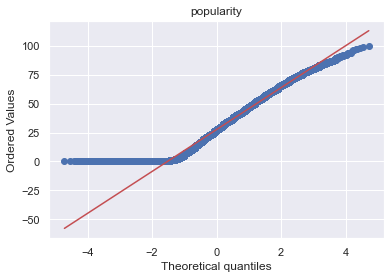

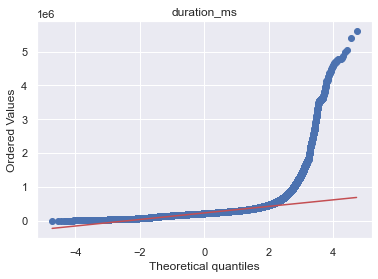

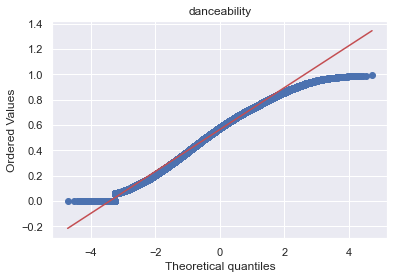

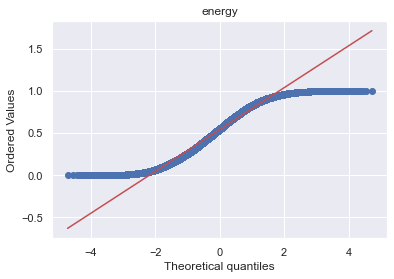

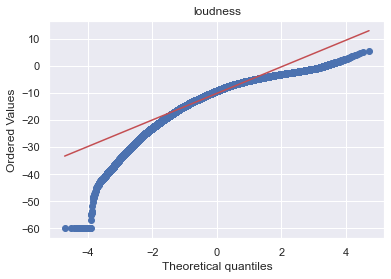

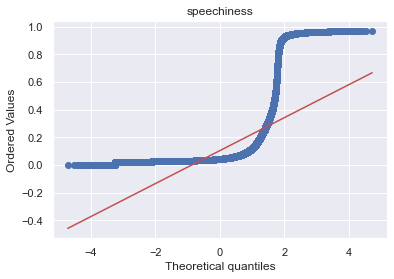

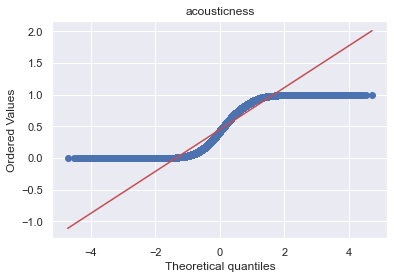

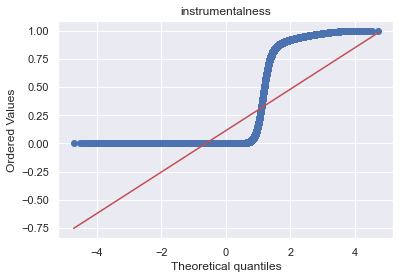

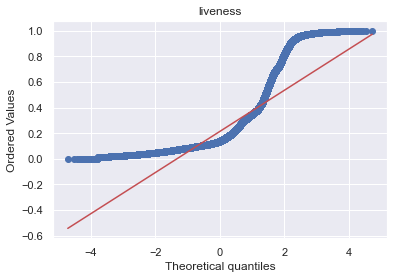

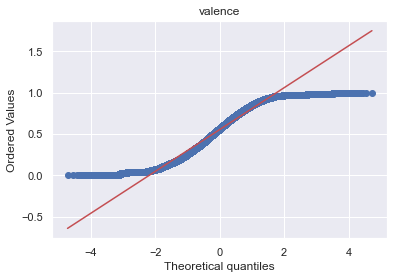

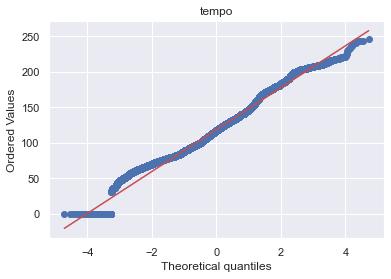

In [22]:
import pylab 
import scipy.stats as stats

# La funcion select_dtypes genera un data frame formado únicamente por
# columnas del tipo indicado como argumento
for col in dfnum.select_dtypes('number').columns:
  stats.probplot(dfnum[col], dist = "norm", plot = plt)
  plt.title(col)
  pylab.show()

Se observa que las variables no siguen una distribución gaussiana.

Por ello, en este contexto, el tratamiento de outliers debería ser revisando variable por variable.

#### Datos numéricos

In [23]:
# Generamos percentiles para cada variable numérica
Percentiles = dfnum.describe(percentiles = list(np.arange(0, 1, 0.01)))

In [24]:
Percentiles.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,230051.167286,0.563594,0.542036,-10.206067,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857
std,18.370642,126526.087418,0.166103,0.251923,5.089328,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108
min,0.000000,3344.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,0.000000,3344.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
# Definimos una función para analizar la distribución de las variable,
# ayudándonos a definir nuevos whiskers, apropiados a la variable graficada
def analisis_outliers(columna, coeficiente):
  sns.distplot(dfnum[columna])
  # Rectas verticales para la media y mediana
  plt.axvline(dfnum[columna].mean(), color = "red", linestyle = "--")
  plt.axvline(dfnum[columna].median(), color = "green", linestyle = "--")
  
  # Cuartiles estándares
  plt.axvline(dfnum[columna].quantile(0.25), color = "black", linestyle = "--")
  plt.axvline(dfnum[columna].quantile(0.75), color = "black", linestyle = "--") 
  
  # Whiskers no estándares 
  whisker_superior_teorico = Percentiles[columna].loc['75%'] + (coeficiente * (Percentiles[columna].loc['75%']-Percentiles[columna].loc['25%']))
  whisker_inferior_teorico = Percentiles[columna].loc['75%'] - (coeficiente * (Percentiles[columna].loc['75%']-Percentiles[columna].loc['25%']))
  # Comparamos respecto al máximo y mínimo de la data,
  # y redefinimos los whiskers, de ser necesario
  if dfnum[columna].max() < whisker_superior_teorico:
    whisker_superior_teorico = dfnum[columna].max()
  if dfnum[columna].min() > whisker_inferior_teorico:
    whisker_inferior_teorico = dfnum[columna].min() #  
  # Graficar los nuevos whiskers
  plt.axvline(whisker_superior_teorico, color = "yellow", linestyle = "--") # outlier por exceso
  plt.axvline(whisker_inferior_teorico, color = "yellow", linestyle = "--") # outlier por defecto

  plt.show()

  outlier = (dfnum[columna] > whisker_superior_teorico) | (dfnum[columna] < whisker_inferior_teorico)
  print(f"Porcentaje de valores atípicos: {(dfnum[columna].loc[outlier].shape[0]/dfnum[columna].shape[0])*100}")
  print("Valores atípicos de la variable seleccionada:")
  print(dfnum[columna].loc[outlier])

# Definimos una función para hallar los índices de los outliers que encontremos con la función previa
def indices_outliers(columna, coeficiente):
  whisker_superior_teorico = Percentiles[columna].loc['75%'] + (coeficiente * (Percentiles[columna].loc['75%']-Percentiles[columna].loc['25%']))
  whisker_inferior_teorico = Percentiles[columna].loc['75%'] - (coeficiente * (Percentiles[columna].loc['75%']-Percentiles[columna].loc['25%']))
  if dfnum[columna].max() < whisker_superior_teorico:
    whisker_superior_teorico = dfnum[columna].max()
  if dfnum[columna].min() > whisker_inferior_teorico:
    whisker_inferior_teorico = dfnum[columna].min() 

  outliersSup = (dfnum[columna] > whisker_superior_teorico)   
  outliersSup=outliersSup[outliersSup == True].index.to_list()

  outliersInf = (dfnum[columna] < whisker_inferior_teorico)
  outliersInf = outliersInf[outliersInf == True].index.to_list()

  outliers=outliersSup+outliersInf+[len(outliersSup)]
  
  return (outliers)

A continuación, trabajaremos caso por caso para las variables en **dfnum**, con el fin de determinar
whiskers apropiados que nos permitan identificar valores atipicos, tales que aquellos valores atípicos
realmente se alejen de la mediana o media de la variable analizada, y que el porcentaje de valores
atípicos obtenido no supere el 10% del total de datos, debido a que sino más adelante imputaríamos
un porcentaje significativo de la data de cada variable numérica, creando así mucha información
ficticia para los modelos predictivos a emplearse.

Particularmente, se explorarán diversos resultados tras cambiar el valor **coeficiente** de la función
`analisis_outliers(., .)`, columna por columna, hasta encontrar whiskers apropiados para cada variable.
Además, el valor de **coeficiente** que eventualmente escojamos como apropiado deberá cumplir que,
al emplear `analisis_outliers(., .)` para la misma columna y para valores menores que el coeficiente escogido
(no todos necesariamente ... **coeficiente** no se trata de un _ínfimo matemático_) 
el porcentaje de valores atípicos obtenidos supere el 10% del total de datos para tal columna numérica.


#### Loudness

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


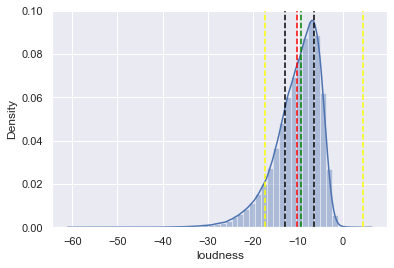

Porcentaje de valores atípicos: 8.955089044645048
Valores atípicos de la variable seleccionada:
1        -22.136
2        -21.180
3        -27.961
9        -23.228
10       -22.447
           ...  
586610   -33.845
586640   -29.059
586657   -28.573
586660   -27.689
586665   -25.551
Name: loudness, Length: 52537, dtype: float64


In [26]:
analisis_outliers('loudness', 1.7)

In [27]:
# Hallemos los índices de los outliers en la columna loudness
indices_outliers_loudness = indices_outliers("loudness", 1.7)
dfnum.loc[indices_outliers_loudness, "loudness"]

indice = indices_outliers_loudness[-1]

indices_outliers_loudness_superior = indices_outliers_loudness[:indice]
indices_outliers_loudness_inferior = indices_outliers_loudness[indice:]

# Calcular los atípicos de la columna loudness

loudness_atipicos_superiores = dfnum["loudness"].iloc[indices_outliers_loudness_superior]
loudness_atipicos_inferiores = dfnum["loudness"].iloc[indices_outliers_loudness_inferior]

# Quitar último elemento, añadido arbitrariamente
indices_outliers_loudness.pop(-1) # SOLO EJECUTAR UNA VEZ ESTA LÍNEA DE CÖDIGO

loudness_no_atipicos = dfnum["loudness"].drop(indices_outliers_loudness, axis = 0)

#### instrumentalness

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


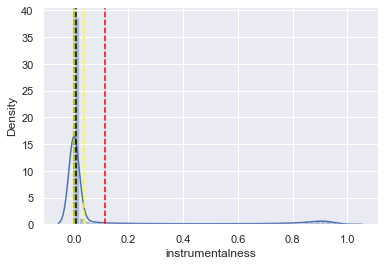

Porcentaje de valores atípicos: 20.401007718111654
Valores atípicos de la variable seleccionada:
0         0.744
3         0.918
4         0.130
5         0.247
9         0.933
          ...  
586643    0.872
586657    0.973
586660    0.959
586665    0.961
586666    0.856
Name: instrumentalness, Length: 119687, dtype: float64


In [28]:
analisis_outliers('instrumentalness', 3)

Tras cambiar el coeficiente (3, en el ejemplo previo), notamos que
para obtener que menos del 10% 

como porcentaje de valores atípicos,
tal coeficiente debe ser mayor que 68.

Por lo tanto, no imputaremos esta variable.

#### liveness

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


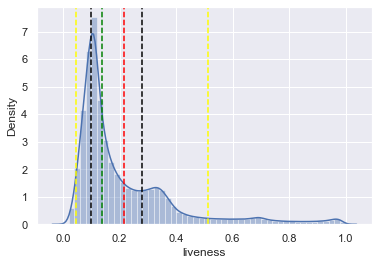

Porcentaje de valores atípicos: 9.510424905228135
Valores atípicos de la variable seleccionada:
19        0.929
24        0.633
33        0.778
46        0.725
48        0.556
          ...  
586619    0.684
586627    0.601
586631    0.697
586638    0.596
586642    0.756
Name: liveness, Length: 55795, dtype: float64


In [29]:
analisis_outliers('liveness', 1.3)

In [30]:
# Hallemos los índices de los outliers en la columna liveness
indices_outliers_liveness = indices_outliers("liveness", 1.3)
dfnum.loc[indices_outliers_liveness, "liveness"]

indice = indices_outliers_liveness[-1]

indices_outliers_liveness_superior = indices_outliers_liveness[:indice]
indices_outliers_liveness_inferior = indices_outliers_liveness[indice:]

# Calcular los atípicos de la columna liveness

liveness_atipicos_superiores = dfnum["liveness"].iloc[indices_outliers_liveness_superior]
liveness_atipicos_inferiores = dfnum["liveness"].iloc[indices_outliers_liveness_inferior]

# Quitar último elemento, añadido arbitrariamente
indices_outliers_liveness.pop(-1) # SOLO EJECUTAR UNA VEZ ESTA LÍNEA DE CÖDIGO

liveness_no_atipicos = dfnum["loudness"].drop(indices_outliers_liveness, axis = 0)

#### valence

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


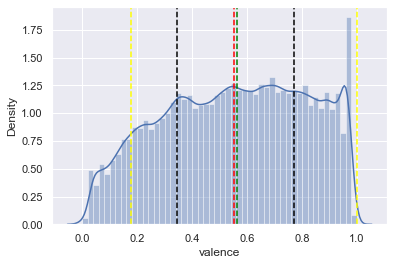

Porcentaje de valores atípicos: 9.002645430496086
Valores atípicos de la variable seleccionada:
0         0.1270
5         0.0539
73        0.1350
85        0.1110
93        0.1530
           ...  
586641    0.1270
586642    0.0639
586643    0.0393
586654    0.1400
586669    0.0663
Name: valence, Length: 52816, dtype: float64


In [31]:
analisis_outliers('valence', 1.4)

In [32]:
# Hallemos los índices de los outliers en la columna valence
indices_outliers_valence = indices_outliers("valence", 1.4)
dfnum.loc[indices_outliers_valence, "valence"]

indice = indices_outliers_valence[-1]

indices_outliers_valence_superior = indices_outliers_valence[:indice]
indices_outliers_valence_inferior = indices_outliers_valence[indice:]

# Calcular los atípicos de la columna valence

valence_atipicos_superiores = dfnum["valence"].iloc[indices_outliers_valence_superior]
valence_atipicos_inferiores = dfnum["valence"].iloc[indices_outliers_valence_inferior]

# Quitar último elemento, añadido arbitrariamente
indices_outliers_valence.pop(-1) # SOLO EJECUTAR UNA VEZ ESTA LÍNEA DE CÖDIGO

valence_no_atipicos = dfnum["valence"].drop(indices_outliers_valence, axis = 0)

#### tempo

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


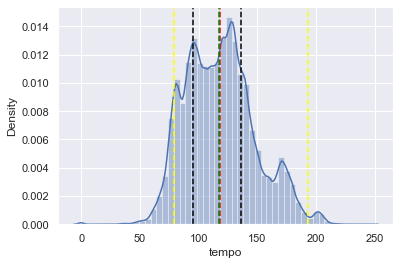

Porcentaje de valores atípicos: 8.905998581831074
Valores atípicos de la variable seleccionada:
9         75.595
15        78.453
16        59.613
18        76.403
20        76.576
           ...  
586606    75.139
586610    63.223
586650    51.414
586657    68.619
586665    63.696
Name: tempo, Length: 52249, dtype: float64


In [33]:
analisis_outliers('tempo', 1.4)

In [34]:
# Hallemos los índices de los outliers en la columna tempo
indices_outliers_tempo = indices_outliers("tempo", 1.4)
dfnum.loc[indices_outliers_tempo, "tempo"]

indice = indices_outliers_tempo[-1]

indices_outliers_tempo_superior = indices_outliers_tempo[:indice]
indices_outliers_tempo_inferior = indices_outliers_tempo[indice:]

# Calcular los atípicos de la columna tempo

tempo_atipicos_superiores = dfnum["tempo"].iloc[indices_outliers_tempo_superior]
tempo_atipicos_inferiores = dfnum["tempo"].iloc[indices_outliers_tempo_inferior]

# Quitar último elemento, añadido arbitrariamente
indices_outliers_tempo.pop(-1) # SOLO EJECUTAR UNA VEZ ESTA LÍNEA DE CÖDIGO

tempo_no_atipicos = dfnum["tempo"].drop(indices_outliers_tempo, axis = 0)

#### duration_ms

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


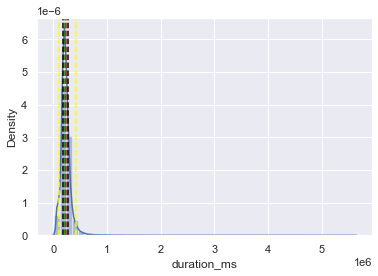

Porcentaje de valores atípicos: 8.998725011590803
Valores atípicos de la variable seleccionada:
1          98200
10         99100
15         96600
16        103200
17         95800
           ...  
586638     55651
586639     83476
586641     83481
586642     83477
586657     82500
Name: duration_ms, Length: 52793, dtype: int64


In [35]:
analisis_outliers('duration_ms', 1.8)

In [36]:
# Hallemos los índices de los outliers en la columna duration
indices_outliers_duration = indices_outliers("duration_ms", 1.8)
dfnum.loc[indices_outliers_duration, "duration_ms"]

indice = indices_outliers_duration[-1]

indices_outliers_duration_superior = indices_outliers_duration[:indice]
indices_outliers_duration_inferior = indices_outliers_duration[indice:]

# Calcular los atípicos de la columna duration

duration_atipicos_superiores = dfnum["duration_ms"].iloc[indices_outliers_duration_superior]
duration_atipicos_inferiores = dfnum["duration_ms"].iloc[indices_outliers_duration_inferior]

# Quitar último elemento, añadido arbitrariamente
indices_outliers_duration.pop(-1) # SOLO EJECUTAR UNA VEZ ESTA LÍNEA DE CÖDIGO

duration_no_atipicos = dfnum["duration_ms"].drop(indices_outliers_duration, axis = 0)

#### danceability

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


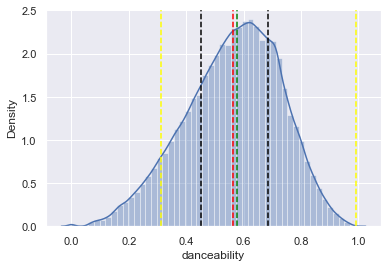

Porcentaje de valores atípicos: 8.21668666648485
Valores atípicos de la variable seleccionada:
5         0.227
12        0.298
33        0.273
36        0.284
45        0.255
          ...  
586606    0.278
586610    0.169
586612    0.298
586625    0.248
586646    0.269
Name: danceability, Length: 48205, dtype: float64


In [37]:
analisis_outliers('danceability', 1.6)

In [38]:
# Hallemos los índices de los outliers en la columna danceability
indices_outliers_danceability = indices_outliers("danceability", 1.6)
dfnum.loc[indices_outliers_danceability, "danceability"]

indice = indices_outliers_danceability[-1]

indices_outliers_danceability_superior = indices_outliers_danceability[:indice]
indices_outliers_danceability_inferior = indices_outliers_danceability[indice:]

# Calcular los atípicos de la columna danceability

danceability_atipicos_superiores = dfnum["danceability"].iloc[indices_outliers_danceability_superior]
danceability_atipicos_inferiores = dfnum["danceability"].iloc[indices_outliers_danceability_inferior]

# Quitar último elemento, añadido arbitrariamente
indices_outliers_danceability.pop(-1) # SOLO EJECUTAR UNA VEZ ESTA LÍNEA DE CÖDIGO

danceability_no_atipicos = dfnum["danceability"].drop(indices_outliers_danceability, axis = 0)

#### energy

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


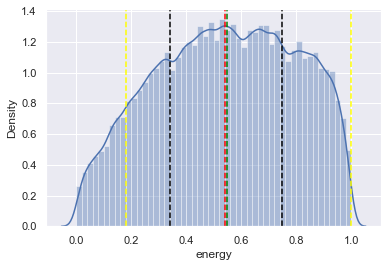

Porcentaje de valores atípicos: 9.323437968745738
Valores atípicos de la variable seleccionada:
2         0.1770
3         0.0946
4         0.1580
9         0.0391
16        0.1710
           ...  
586610    0.1720
586640    0.0251
586657    0.0172
586660    0.0289
586665    0.0331
Name: energy, Length: 54698, dtype: float64


In [39]:
analisis_outliers('energy', 1.4)

In [40]:
# Hallemos los índices de los outliers en la columna energy
indices_outliers_energy = indices_outliers("energy", 1.4)
dfnum.loc[indices_outliers_energy, "energy"]

indice = indices_outliers_energy[-1]

indices_outliers_energy_superior = indices_outliers_energy[:indice]
indices_outliers_energy_inferior = indices_outliers_energy[indice:]

# Calcular los atípicos de la columna energy

energy_atipicos_superiores = dfnum["energy"].iloc[indices_outliers_energy_superior]
energy_atipicos_inferiores = dfnum["energy"].iloc[indices_outliers_energy_inferior]

# Quitar último elemento, añadido arbitrariamente
indices_outliers_energy.pop(-1) # SOLO EJECUTAR UNA VEZ ESTA LÍNEA DE CÖDIGO

energy_no_atipicos = dfnum["energy"].drop(indices_outliers_energy, axis = 0)

#### speechiness

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


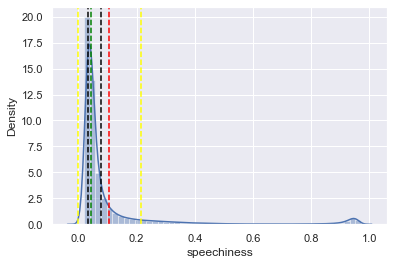

Porcentaje de valores atípicos: 9.884739684184689
Valores atípicos de la variable seleccionada:
0         0.451
1         0.957
10        0.960
11        0.955
12        0.453
          ...  
586567    0.274
586589    0.374
586608    0.308
586611    0.327
586614    0.283
Name: speechiness, Length: 57991, dtype: float64


In [41]:
analisis_outliers('speechiness', 3.3)

In [42]:
# Hallemos los índices de los outliers en la columna speechiness
indices_outliers_speechiness = indices_outliers("speechiness", 3.3)
dfnum.loc[indices_outliers_speechiness, "speechiness"]

indice = indices_outliers_speechiness[-1]

indices_outliers_speechiness_superior = indices_outliers_speechiness[:indice]
indices_outliers_speechiness_inferior = indices_outliers_speechiness[indice:]

# Calcular los atípicos de la columna speechiness

speechiness_atipicos_superiores = dfnum["speechiness"].iloc[indices_outliers_speechiness_superior]
speechiness_atipicos_inferiores = dfnum["speechiness"].iloc[indices_outliers_speechiness_inferior]

# Quitar último elemento, añadido arbitrariamente
indices_outliers_speechiness.pop(-1) # SOLO EJECUTAR UNA VEZ ESTA LÍNEA DE CÖDIGO

speechiness_no_atipicos = dfnum["speechiness"].drop(indices_outliers_speechiness, axis = 0)

#### acousticness

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


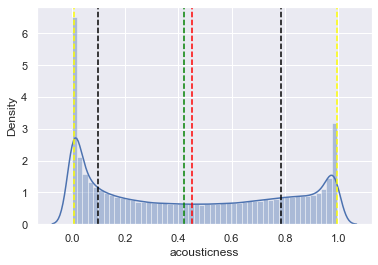

Porcentaje de valores atípicos: 8.769977091117354
Valores atípicos de la variable seleccionada:
403       0.000243
569       0.000591
609       0.000065
784       0.000847
848       0.002620
            ...   
586638    0.003440
586639    0.000129
586641    0.000039
586642    0.000239
586643    0.000898
Name: acousticness, Length: 51451, dtype: float64


In [43]:
analisis_outliers('acousticness', 1.13)

In [44]:
# Hallemos los índices de los outliers en la columna acousticness
indices_outliers_acousticness = indices_outliers("acousticness", 1.13)
dfnum.loc[indices_outliers_acousticness, "acousticness"]

indice = indices_outliers_acousticness[-1]

indices_outliers_acousticness_superior = indices_outliers_acousticness[:indice]
indices_outliers_acousticness_inferior = indices_outliers_acousticness[indice:]

# Calcular los atípicos de la columna acousticness

acousticness_atipicos_superiores = dfnum["acousticness"].iloc[indices_outliers_acousticness_superior]
acousticness_atipicos_inferiores = dfnum["acousticness"].iloc[indices_outliers_acousticness_inferior]

# Quitar último elemento, añadido arbitrariamente
indices_outliers_acousticness.pop(-1) # SOLO EJECUTAR UNA VEZ ESTA LÍNEA DE CÖDIGO

acousticness_no_atipicos = dfnum["acousticness"].drop(indices_outliers_acousticness, axis = 0)

### Imputación de variables

In [45]:
# popularity_atipicos_superiores
# duration_atipicos_superiores
# danceability_atipicos_superiores
# energy_atipicos_superiores
# loudness_atipicos_superiores
# speechiness_atipicos_superiores
# acousticness_atipicos_superiores
# liveness_atipicos_superiores
# valence_atipicos_superiores
# tempo_atipicos_superiores

# popularity_atipicos_inferiores
# duration_atipicos_inferiores
# danceability_atipicos_inferiores
# energy_atipicos_inferiores
# loudness_atipicos_inferiores
# speechiness_atipicos_inferiores
# acousticness_atipicos_inferiores
# liveness_atipicos_inferiores
# valence_atipicos_inferiores
# tempo_atipicos_inferiores


# popularity_no_atipicos
# duration_no_atipicos
# danceability_no_atipicos
# energy_no_atipicos
# loudness_no_atipicos
# speechiness_no_atipicos
# acousticness_no_atipicos
# liveness_no_atipicos
# valence_no_atipicos
# tempo_no_atipicos

In [46]:
# Considerar solamente las variables que serán imputadas
indices_outliers_en_dfnum = { 
  "duration_ms":indices_outliers_duration, 
  "danceability":indices_outliers_danceability, 
  "energy":indices_outliers_energy, 
  "loudness":indices_outliers_loudness, 
  "speechiness":indices_outliers_speechiness, 
  "acousticness":indices_outliers_acousticness, 
  "liveness":indices_outliers_liveness, 
  "valence":indices_outliers_valence, 
  "tempo":indices_outliers_tempo
}

from copy import copy
dfnum_sin_outliers = copy(dfnum)

for columna in list(indices_outliers_en_dfnum.keys()):
  dfnum_sin_outliers[columna].iloc[indices_outliers_en_dfnum[columna]] = pd.NA


C:\Users\HP\AppData\Local\Temp\ipykernel_15484\3483852654.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnum_sin_outliers[columna].iloc[indices_outliers_en_dfnum[columna]] = pd.NA


In [47]:
# Revisamos la conversión de datos atípicos a vacíos (pd.NA),
# y hallamos la proporción de vacíos en la data
vacios = pd.DataFrame(dfnum_sin_outliers.isnull().sum()).sort_values(0, ascending=True)
vacios.columns = ['vacios']
vacios['vacios%'] = round(vacios['vacios'] / dfnum.shape[0], 2) * 100
vacios 

,vacios,vacios%
popularity,0,0.0
instrumentalness,0,0.0
danceability,48205,8.0
acousticness,51451,9.0
tempo,52249,9.0
loudness,52537,9.0
duration_ms,52793,9.0
valence,52816,9.0
energy,54698,9.0
liveness,55795,10.0


Note que el porcentaje de datos vacíos (atípicos, en realidad, pues la data numérica inicial no tenía datos vacíos)
es cercana al 10%, muy por encima del 0%. 

Entonces, una imputación vía la mediana podría resultar adecuada, pero es al menos mejor opción
que imputar vía la media.

In [48]:
dfnum_imputada = dfnum_sin_outliers.fillna(dfnum_sin_outliers.median())

### Transformación de variables

#### name

In [49]:
## incluir metricas sobre name para tener nuevas variables
## buscamos contar el numero de caracteres de la variable name sin contar los espacios
## creamos una nueva columna donde se guardaran los nombres
dfcat["name_sin_espacios"] = dfcat["name"].str.replace(' ','')

In [50]:
# Ahora tomamos la longitud de la cadena pero de la columna que ya no tiene espacios y creamos la nueva variable 
dfcat["Name_Length"] = dfcat["name_sin_espacios"].str.len() 
# Creamos una nueva variable para llevar el contros de la cantidad de palabras que tiene el nombre 
dfcat["words_name"] = dfcat["name"].str.split().str.len()

In [51]:
# eliminamos la variable auxiliar que creamos
dfcat.drop(["name_sin_espacios"], axis = 1, inplace = True)

In [52]:
dfcat.head()

,id,name,explicit,id_artists,release_date,key,mode,time_signature,Name_Length,words_name
0,35iwgR4jXetI318WEWsa1Q,Carve,0,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0,1,3,5.0,1.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0,1,1,31.0,5.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,1,1,5,30.0,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,7,1,3,26.0,4.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,3,0,4,16.0,4.0


In [53]:
# como vimos en pasos anteriores la columna name por si sola no nos daba información relevante, 
# pero no podía ser eliminada porque se usaría en este paso
#Ahora que ya fue usada podemos eliminarla
dfcat.drop(["name"], axis = 1, inplace = True)

#### release_date

In [54]:
# Creo nuevas columnas que asumiran el valor del año, mes y día de la fecha de lanzamiento
dfcat['release_year'] = pd.DatetimeIndex(dfcat['release_date']).year
dfcat['release_month'] = pd.DatetimeIndex(dfcat['release_date']).month
dfcat['release_day'] = pd.DatetimeIndex(dfcat['release_date']).day

In [55]:
# Crearé también una columna que divida a los meses de lanzamiento por trimestres 
release_trim = []
size = len(dfcat['release_date'])

for i in range(size):
  if(dfcat['release_date'][i].month > 0 and dfcat['release_date'][i].month < 4):
    release_trim.append(1)
  if(dfcat['release_date'][i].month > 3 and dfcat['release_date'][i].month < 7):
    release_trim.append(2)
  if(dfcat['release_date'][i].month > 6 and dfcat['release_date'][i].month < 10):
    release_trim.append(3)
  if(dfcat['release_date'][i].month > 9 and dfcat['release_date'][i].month < 13):
    release_trim.append(4)

In [56]:
dfcat['release_trim'] = release_trim
dfcat.head()

,id,explicit,id_artists,release_date,key,mode,time_signature,Name_Length,words_name,release_year,release_month,release_day,release_trim
0,35iwgR4jXetI318WEWsa1Q,0,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0,1,3,5.0,1.0,1922,2,22,1
1,021ht4sdgPcrDgSk7JTbKY,0,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0,1,1,31.0,5.0,1922,6,1,2
2,07A5yehtSnoedViJAZkNnc,0,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,1,1,5,30.0,5.0,1922,3,21,1
3,08FmqUhxtyLTn6pAh6bk45,0,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,7,1,3,26.0,4.0,1922,3,21,1
4,08y9GfoqCWfOGsKdwojr5e,0,['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,3,0,4,16.0,4.0,1922,1,1,1


In [57]:
# Finalmente elimino la columna release_date
del dfcat['release_date']

#### time_signature

In [58]:
# Crearemos una lista que reemplazará los valores de time signature, si van de 0 a 3 entonces tomarán 0; en caso contrario tomaran 1
list_time = []
for i in range(size):
  if(int(dfcat['time_signature'][i])>=0 and int(dfcat['time_signature'][i])<4):
    list_time.append('0')
  if(int(dfcat['time_signature'][i])>=4):
    list_time.append('1')

In [59]:
del dfcat['time_signature']
dfcat['time_signature'] = list_time
dfcat.head()

,id,explicit,id_artists,key,mode,Name_Length,words_name,release_year,release_month,release_day,release_trim,time_signature
0,35iwgR4jXetI318WEWsa1Q,0,['45tIt06XoI0Iio4LBEVpls'],0,1,5.0,1.0,1922,2,22,1,0
1,021ht4sdgPcrDgSk7JTbKY,0,['14jtPCOoNZwquk5wd9DxrY'],0,1,31.0,5.0,1922,6,1,2,0
2,07A5yehtSnoedViJAZkNnc,0,['5LiOoJbxVSAMkBS2fUm3X2'],1,1,30.0,5.0,1922,3,21,1,1
3,08FmqUhxtyLTn6pAh6bk45,0,['5LiOoJbxVSAMkBS2fUm3X2'],7,1,26.0,4.0,1922,3,21,1,0
4,08y9GfoqCWfOGsKdwojr5e,0,['3BiJGZsyX9sJchTqcSA7Su'],3,0,16.0,4.0,1922,1,1,1,1


In [60]:
# Decripción de las variables listas para el modelamiento
dfnum_imputada.describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,223982.054918,0.593084,0.586671,-9.061881,0.053600,0.492827,0.113451,0.169490,0.596728,121.370466
std,18.370642,58722.858297,0.132949,0.209061,3.453210,0.033855,0.320020,0.266868,0.100234,0.215943,24.938452
min,0.000000,104080.000000,0.314000,0.182000,-17.377000,0.000000,0.007450,0.000000,0.044400,0.177000,79.312000
25%,13.000000,184633.000000,0.499000,0.426000,-11.422000,0.034000,0.189000,0.000000,0.101000,0.426000,101.981750
50%,27.000000,216800.000000,0.595000,0.585000,-8.705000,0.041600,0.492000,0.000024,0.131000,0.601000,120.004000
75%,41.000000,255747.000000,0.686000,0.748000,-6.482000,0.057300,0.785000,0.009550,0.217000,0.769000,135.525000
max,100.000000,423640.000000,0.991000,1.000000,4.362000,0.215000,0.996000,1.000000,0.511000,1.000000,193.324000


In [61]:
# Características de la data numérica previa a la imputación
dfnum.describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.563594,0.542036,-10.206067,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857
std,18.370642,1.265261e+05,0.166103,0.251923,5.089328,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108
min,0.000000,3.344000e+03,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.453000,0.343000,-12.891000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000
50%,27.000000,2.148930e+05,0.577000,0.549000,-9.243000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000
75%,41.000000,2.638670e+05,0.686000,0.748000,-6.482000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000
max,100.000000,5.621218e+06,0.991000,1.000000,5.376000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000


#### Analisis de correlación

<AxesSubplot:>

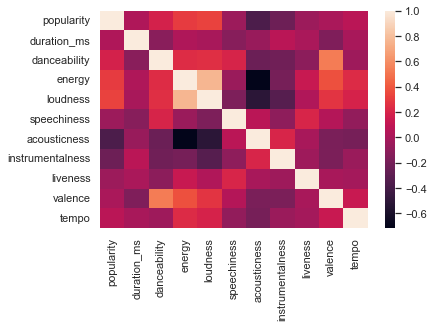

In [271]:
sns.heatmap(dfnum.corr())